2D sim: Silicon nanowire shape
=========================================
*Author: Clément Majorel*  *(internal H-field calculation also contributed by C. Majorel)*

In this example, we calculate the electric and magnetic field intensity inside silicon nanowires of different shapes. C.f. also [1].

[1]: Wiecha: *Linear and nonlinear optical properties of high refractive index dielectric nanostructures* **PhD thesis** 2016 (https://tel.archives-ouvertes.fr/tel-01582148/)

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import core
from pyGDM2 import linear
from pyGDM2 import tools
from pyGDM2 import visu

## for 2D simulations we need the 2D Greens Dyads
from pyGDM2.propagators import propagators_2D

import numpy as np
import matplotlib.pyplot as plt

## in this example we also define the solver here
# solver_method = 'cupy'   # via CUDA on GPU
solver_method = 'scipyinv'

/home/hans/.local/lib/python3.8/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'VersionConflict((scipy 1.7.1 (/home/hans/.local/lib/python3.8/site-packages), Requirement.parse('scipy<=1.6.2,>=0.16')))'.
  numba.core.entrypoints.init_all()


2D structures
--------------------------------

2D structures have to be defined in the XZ plane, meshpoints need to be in the plane y=0. Futhermore, 2D supports only square meshes (="cubic" in structure generators)

Number of dipoles circular: 885
Number of dipoles square: 841
Number of dipoles triangle: 836


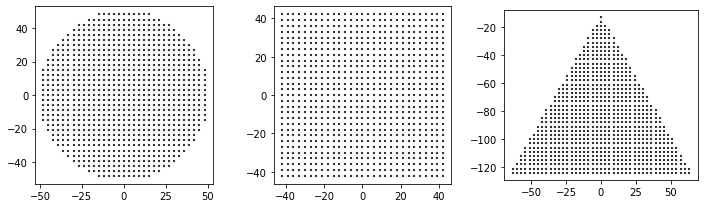

In [2]:
# =============================================================================
# Definition of 2D geometries
# =============================================================================
## --- 2D supports only cubic mesh (corresponds to a square mesh in 2D)
mesh = 'cube'          ## -- mesh grid type (same for all the structures)
step = 3               ## -- mesh step (same for all the structures)


## --- circular cross section
Rnm = 50.
R = Rnm / step
geo_cir = structures.nanodisc(step, R, H=1, mesh=mesh)
geo_cir = structures.rotate(geo_cir, 90., axis='x')
geo_cir = structures.center_struct(geo_cir)
geo_cir.T[1] = 0  # set y=0 (all dipoles need to be in XZ plane for 2D structures)


### --- square cross section
Lnm = 88.
L = int(Lnm / step)
geo_sq = structures.rect_wire(step, L=L, W=L, H=1, mesh=mesh)
geo_sq = structures.rotate(geo_sq, 90., axis='x')
geo_sq = structures.center_struct(geo_sq)
geo_sq.T[1] = 0  # set y=0 (all dipoles need to be in XZ plane for 2D structures)


### --- triangular cross section
NSIDEnm = 134.
NSIDE = int(NSIDEnm / step)
geo_tri = structures.prism(step, NSIDE, H=1, mesh=mesh)
geo_tri = structures.rotate(geo_tri, 90., axis='x')
geo_tri = structures.center_struct(geo_tri)
geo_tri.T[1] = 0  # set y=0 (all dipoles need to be in XZ plane for 2D structures)
geo_tri.T[2] -= NSIDEnm/2


print("Number of dipoles circular:", len(geo_cir))
print("Number of dipoles square:", len(geo_sq))
print("Number of dipoles triangle:", len(geo_tri))


## plot the geometries
plt.figure(figsize=(10, 3))

plt.subplot(131, aspect='equal')
visu.structure(geo_cir, projection='xz', show=0)

plt.subplot(132, aspect='equal')
visu.structure(geo_sq, projection='xz', show=0)

plt.subplot(133, aspect='equal')
visu.structure(geo_tri, projection='xz', show=0)

plt.tight_layout()
plt.show()

Simulation setup
----------------------------------

The simulation setup is identical to a 3D simulation with the only difference that we use an instance of the class defining the 2D dyads set (`propagators_2D.DyadsQuasistatic2D123`)

In [3]:
## --- setup silicon nanowire structures
material = materials.silicon()

struct_cir = structures.struct(step, geo_cir, material)
struct_sq = structures.struct(step, geo_sq, material)
struct_tri = structures.struct(step, geo_tri, material)

## --- setup incident field
field_generator = fields.plane_wave
wavelengths = [550.]
kwargs = dict(theta=90)

efield = fields.efield(field_generator,
            wavelengths=wavelengths, kwargs=kwargs)

## --- setup 2D environment (vacuum)
n1 = n2 = 1.0
dyads_2d_vac = propagators_2D.DyadsQuasistatic2D123(n1=n1, n2=n2)


## --- initialize all the simulations
sim_sq = core.simulation(struct_sq, efield, dyads=dyads_2d_vac)
sim_cir = core.simulation(struct_cir, efield, dyads=dyads_2d_vac)
sim_tri = core.simulation(struct_tri, efield, dyads=dyads_2d_vac)

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 885/885 dipoles valid
structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 841/841 dipoles valid
structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 836/836 dipoles valid


Run the 2D simulation
---------------------------------

Now we run the simulations exactly like a 3D simulation. Here we want to plot also the magnetic field intensity, so we pass the argument `calc_H=True`.

In [4]:
## --- run all the simulations, calculate E and H fields
sim_sq.scatter(method=solver_method, calc_H=True)
sim_cir.scatter(method=solver_method, calc_H=True)
sim_tri.scatter(method=solver_method, calc_H=True)

timing for wl=550.00nm - setup: EE 5622.3ms, HE 1857.2ms, inv.: 393.8ms, repropa.: 3578.1ms (1 field configs), tot: 11454.9ms
timing for wl=550.00nm - setup: EE 271.2ms, HE 451.1ms, inv.: 463.2ms, repropa.: 49.3ms (1 field configs), tot: 1238.7ms
timing for wl=550.00nm - setup: EE 240.5ms, HE 357.3ms, inv.: 374.6ms, repropa.: 49.1ms (1 field configs), tot: 1025.8ms


1

Plot
------------------------

/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:1140: UserWarning: Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!
  warnings.warn("Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!")
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:1140: UserWarning: Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!
  warnings.warn("Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!")


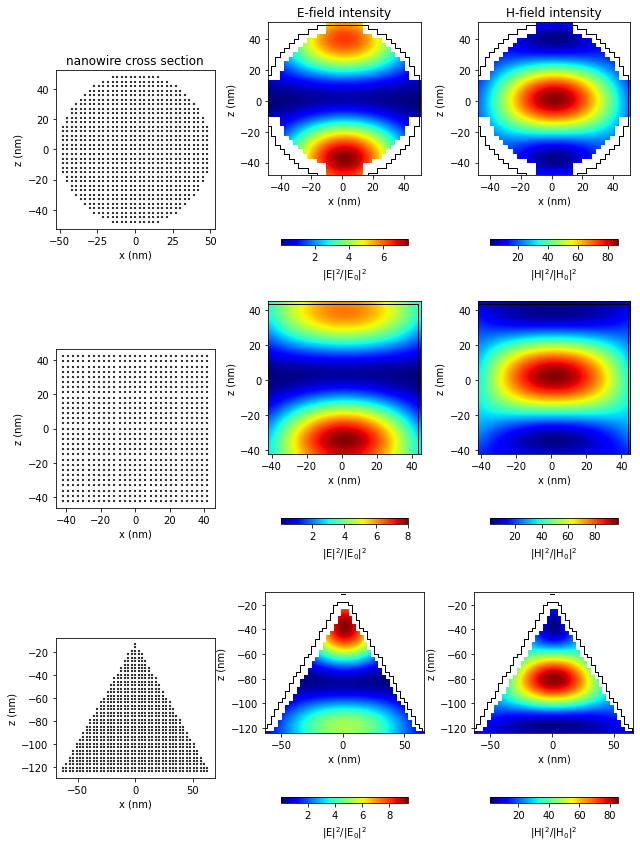

In [5]:
plt.figure(figsize=(9.,12.))
## ---------------------------- plot circular part
## -- structure projection
plt.subplot(331, aspect='equal')
visu.structure(geo_cir, color='auto', show=False, tit="nanowire cross section")
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

## -- E-field map
plt.subplot(332)
plt.title("E-field intensity")
visu.structure_contour(sim_cir, show=0, color='k')
im = visu.vectorfield_color_by_fieldindex(sim_cir, 0, show=0, which_field='E', 
                                          cmap='jet', interpolation='bicubic')
plt.colorbar(im, label=r'|E|$^2$/|E$_0$|$^2$', orientation='horizontal',
                                         ticks=[0.,2.,4.,6.,8.], pad=0.25, shrink=0.8)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

## -- H-field map
plt.subplot(333)
plt.title("H-field intensity")
visu.structure_contour(sim_cir, show=0, color='k')
im = visu.vectorfield_color_by_fieldindex(sim_cir, 0, show=0, which_field='H', 
                                          cmap='jet', interpolation='bicubic')
plt.colorbar(im, label=r'|H|$^2$/|H$_0$|$^2$', orientation='horizontal',
                                         ticks=[0.,20.,40.,60.,80.], pad=0.25, shrink=0.8)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")


## ---------------------------- plot rectangular part
## -- structure projection
plt.subplot(334, aspect='equal')
visu.structure(geo_sq, color='auto', show=False)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

## -- E-field map
plt.subplot(335)
visu.structure_contour(sim_sq, show=0, color='k')
im = visu.vectorfield_color_by_fieldindex(sim_sq, 0, show=0, which_field='E', 
                                          cmap='jet', interpolation='bicubic')
plt.colorbar(im, label=r'|E|$^2$/|E$_0$|$^2$', orientation='horizontal',
                                         ticks=[0.,2.,4.,6.,8.], pad=0.25, shrink=0.8)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

## -- H-field map
plt.subplot(336)
visu.structure_contour(sim_sq, show=0, color='k')
im = visu.vectorfield_color_by_fieldindex(sim_sq, 0, show=0, which_field='H', 
                                          cmap='jet', interpolation='bicubic')
plt.colorbar(im, label=r'|H|$^2$/|H$_0$|$^2$', orientation='horizontal',
                                         ticks=[0.,20.,40.,60.,80.], pad=0.25, shrink=0.8)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")


## ---------------------------- plot triangular part
## -- structure projection
plt.subplot(337, aspect='equal')
visu.structure(geo_tri, color='auto', show=False)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

## -- E-field map
plt.subplot(338)
visu.structure_contour(sim_tri, show=0, color='k')
im = visu.vectorfield_color_by_fieldindex(sim_tri, 0, show=0, which_field='E', 
                                          cmap='jet', interpolation='bicubic')
plt.colorbar(im, label=r'|E|$^2$/|E$_0$|$^2$', orientation='horizontal',
                                         ticks=[0.,2.,4.,6.,8.], pad=0.25, shrink=0.8)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

## -- H-field map
plt.subplot(339)
visu.structure_contour(sim_tri, show=0, color='k')
im = visu.vectorfield_color_by_fieldindex(sim_tri, 0, show=0, which_field='H', 
                                          cmap='jet', interpolation='bicubic')
plt.colorbar(im, label=r'|H|$^2$/|H$_0$|$^2$', orientation='horizontal',
                                         ticks=[0.,20.,40.,60.,80.], pad=0.25, shrink=0.8)
plt.xlabel("x (nm)")
plt.ylabel("z (nm)")

plt.tight_layout()
plt.show()

Use linear functions
-----------------------------

We can now calculate the extinction, near-field etc. just as with 3D simulations. We need just to make sure that the evaluations are taking place in the plane Y=0!

/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:1140: UserWarning: Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!
  warnings.warn("Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!")
/home/hans/.local/lib/python3.8/site-packages/pyGDM2/tools.py:1140: UserWarning: Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!
  warnings.warn("Indefinite surface element (meshpoint is part of two surfaces)! Using one of two possible sides for normal vector direction!")


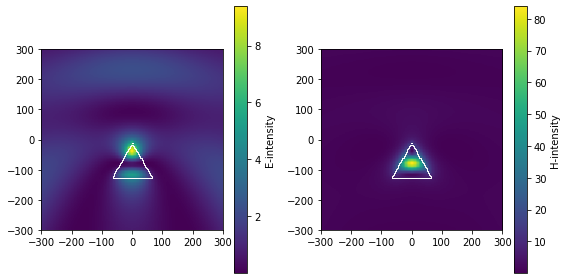

In [6]:
r_probe = tools.generate_NF_map_XZ(-300,300,61, -300,300,61, Y0=0)

Et, Bt = linear.nearfield(sim_tri, 0, r_probe, which_fields=['Et', 'Bt'])

plt.figure(figsize=(8,4))
plt.subplot(121)
visu.structure_contour(sim_tri, show=0, color='w')
im = visu.vectorfield_color(Et, show=0)
plt.colorbar(im, label="E-intensity")

plt.subplot(122)
visu.structure_contour(sim_tri, show=0, color='w')
im = visu.vectorfield_color(Bt, show=0)
plt.colorbar(im, label="H-intensity")

plt.tight_layout()
plt.show()
